# PCOS Diagnosis Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d samikshadalvi/pcos-diagnosis-dataset

Dataset URL: https://www.kaggle.com/datasets/samikshadalvi/pcos-diagnosis-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/6.96k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 6.96k/6.96k [00:00<00:00, 23.2MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile("/home/bhxveshhh/ML/PCOS Diagnosis Prediction/pcos-diagnosis-dataset.zip", 'r')
zip_ref.extractall('/home/bhxveshhh/ML/PCOS Diagnosis Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("pcos_dataset.csv")

In [5]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [6]:
df.shape

(1000, 6)

In [7]:
df.size

6000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,31.7710,8.463462,18.0,24.0,32.0,39.00,45.0
BMI,1000.0,26.3870,4.935540,18.1,21.9,26.4,30.50,35.0
Menstrual_Irregularity,1000.0,0.5300,0.499349,0.0,0.0,1.0,1.00,1.0
Testosterone_Level(ng/dL),1000.0,60.1595,23.160204,20.0,41.7,60.0,80.30,99.8
Antral_Follicle_Count,1000.0,17.4690,7.069301,5.0,12.0,18.0,23.25,29.0
PCOS_Diagnosis,1000.0,0.1990,0.399448,0.0,0.0,0.0,0.00,1.0


In [11]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

Age                           28
BMI                          170
Menstrual_Irregularity         2
Testosterone_Level(ng/dL)    577
Antral_Follicle_Count         25
PCOS_Diagnosis                 2
dtype: int64

In [14]:
df['PCOS_Diagnosis'].value_counts()

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

## Data Visualization

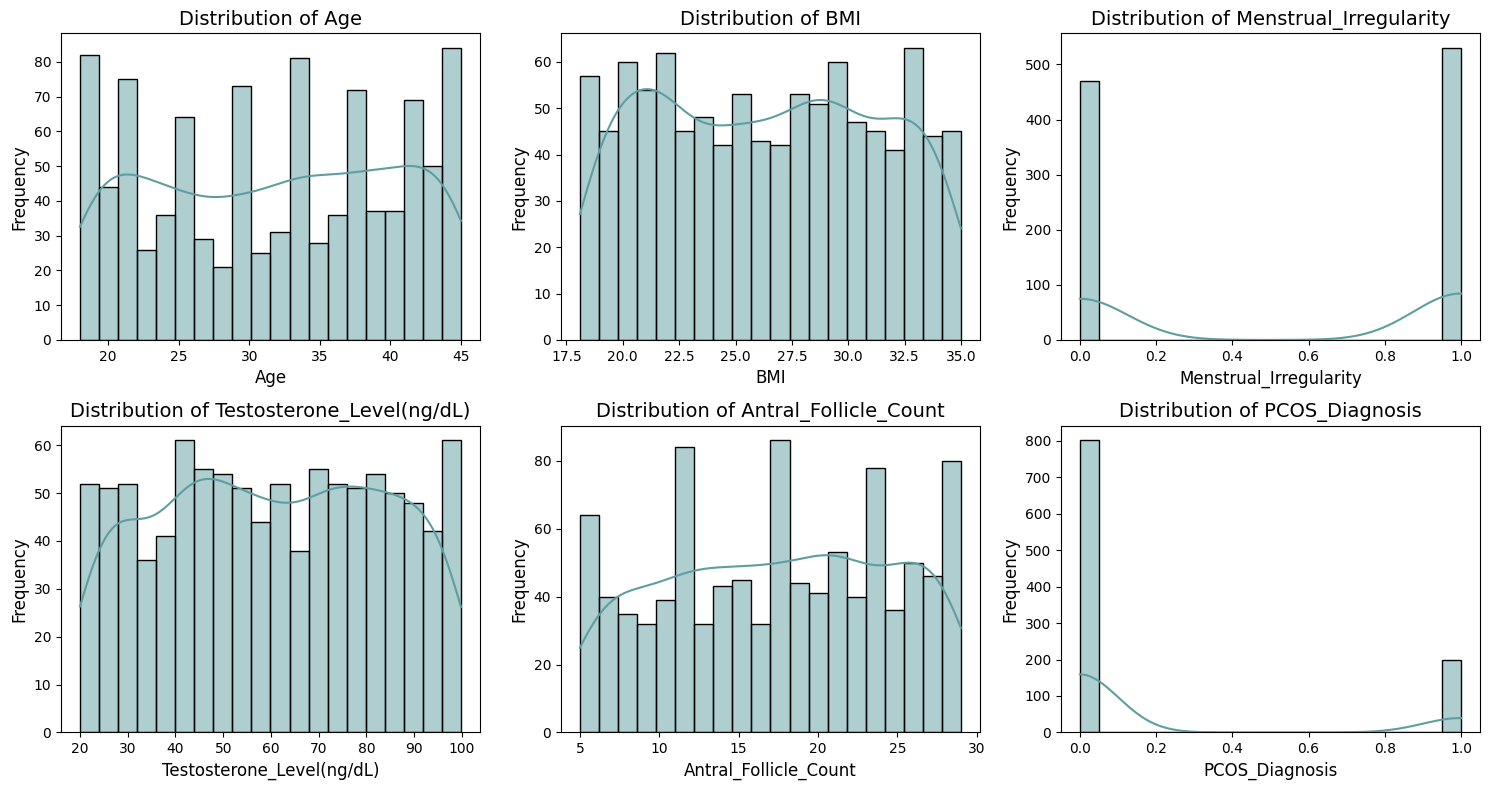

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

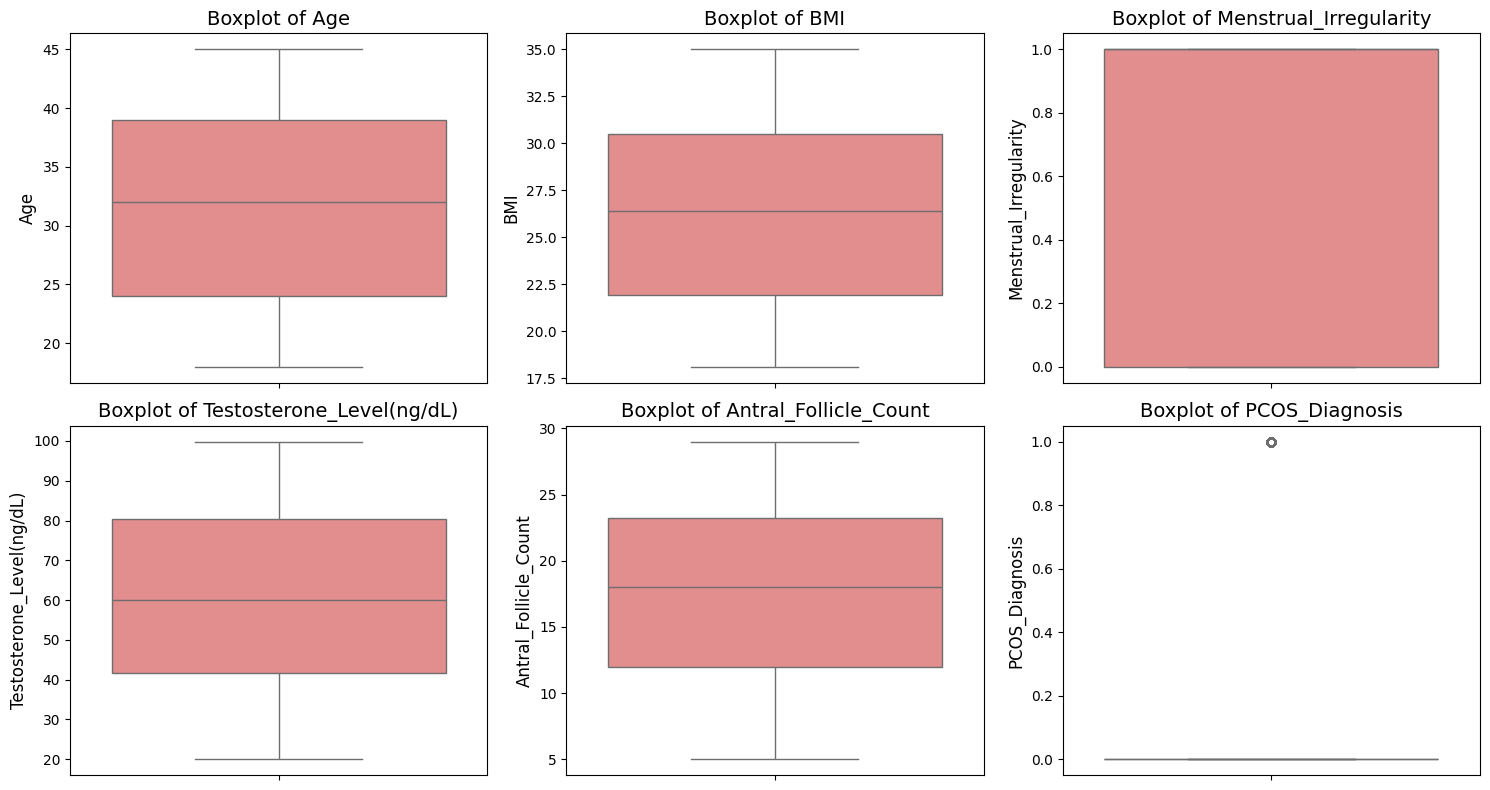

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

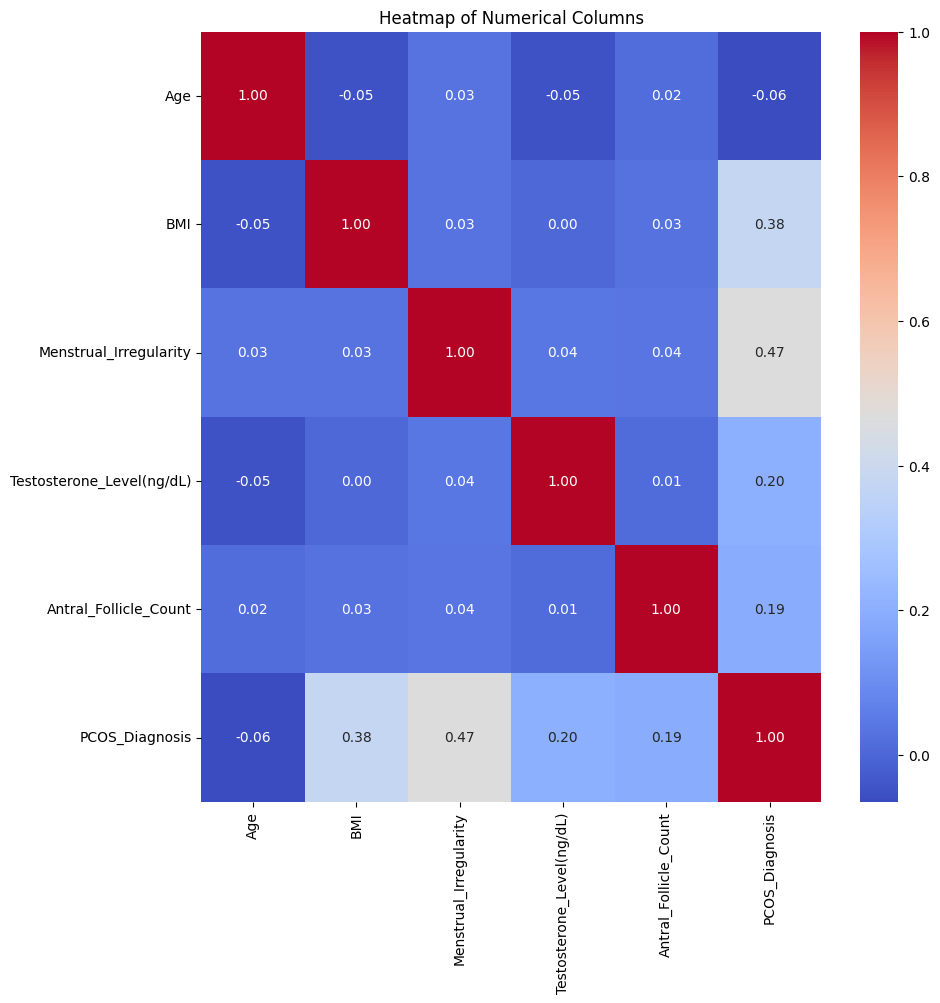

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['PCOS_Diagnosis'])
y = df['PCOS_Diagnosis']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Training

In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [25]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.87, 0.85, 0.995, 0.99, 0.985, 0.995, 0.99, 0.99, 0.955]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       161
           1       0.62      0.85      0.72        39

    accuracy                           0.87       200
   macro avg       0.79      0.86      0.82       200
weighted avg       0.89      0.87      0.88       200

Confusion Matrix:
 [[141  20]
 [  6  33]]


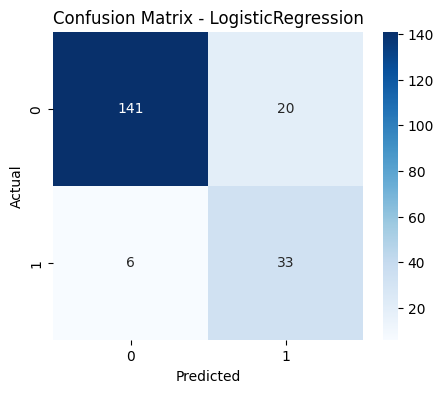

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       161
           1       0.57      0.95      0.71        39

    accuracy                           0.85       200
   macro avg       0.78      0.89      0.81       200
weighted avg       0.90      0.85      0.86       200

Confusion Matrix:
 [[133  28]
 [  2  37]]


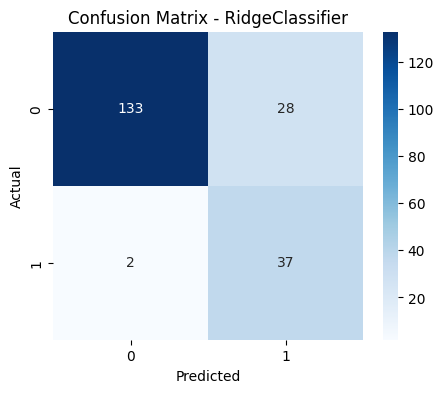

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.97      0.99        39

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
 [[161   0]
 [  1  38]]


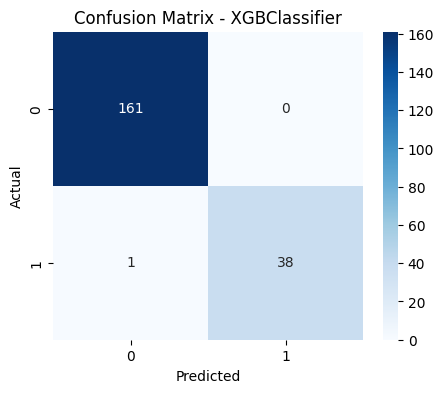

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.95      0.97        39

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[161   0]
 [  2  37]]


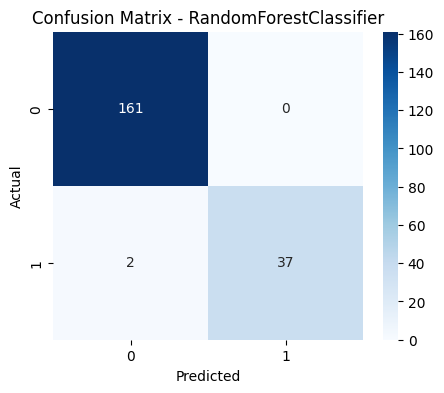

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.92      0.96        39

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.98       200
weighted avg       0.99      0.98      0.98       200

Confusion Matrix:
 [[161   0]
 [  3  36]]


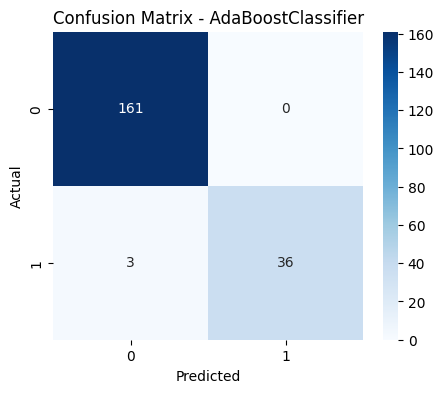

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.97      0.99        39

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
 [[161   0]
 [  1  38]]


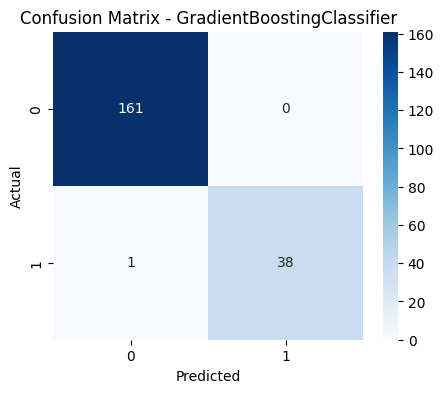

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.95      0.97        39

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[161   0]
 [  2  37]]


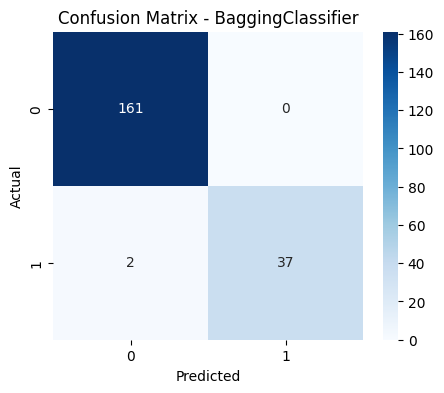

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.95      0.97        39

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[161   0]
 [  2  37]]


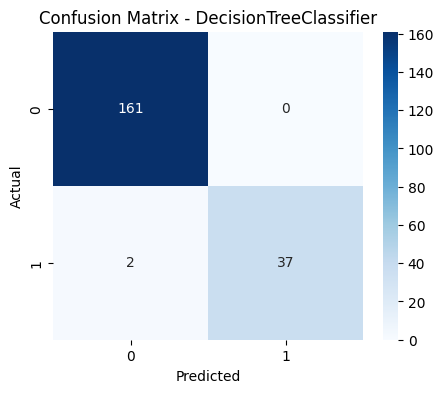

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.84      0.95      0.89        39

    accuracy                           0.95       200
   macro avg       0.91      0.95      0.93       200
weighted avg       0.96      0.95      0.96       200

Confusion Matrix:
 [[154   7]
 [  2  37]]


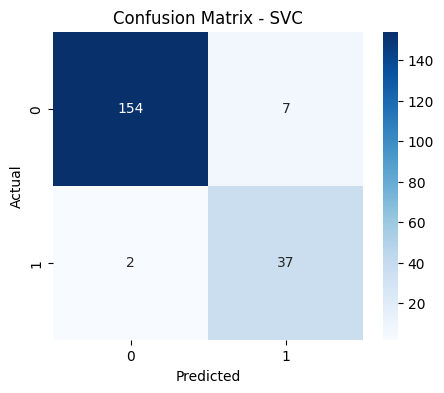

In [26]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()